# Importing Libraries

In [1]:
import pandas as pd #importing pandas for dataframe
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #for pandas dataframes representation
import numpy as np #to perform array operations
from sklearn.model_selection import train_test_split #splitting of training and testing data
from sklearn.metrics import classification_report #to give us accuracy
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE #to oversample the imbalanced data 
from sklearn.metrics import plot_roc_curve
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


 # Data Interpretation And Analysis

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv') #reading the dataset from uc Irvine
df = data.copy() #copying the data into dataframe df
df #showing the entire dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


False    10422
True      1908
Name: Revenue, dtype: int64

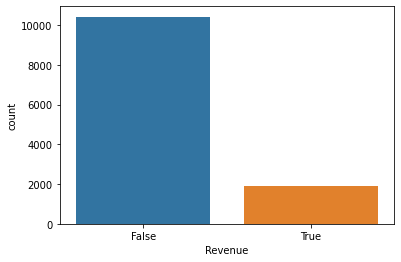

In [4]:
sns.countplot(df.Revenue) #plots the revenue for both false and true
df.Revenue.value_counts() #counting the false and true labels in revenue

# Feature Extraction 

In [5]:
df = pd.get_dummies( df, columns = ['VisitorType','Month']) #converting categorical variable into dummy
df['Weekend'] = df['Weekend'].astype(int) #casting into integer data type
df['Revenue'] = df['Revenue'].astype(int) #casting into integer data type


# Training and Testing

In [6]:
X = df.drop('Revenue', axis=1) #input features
Y = df['Revenue'] #target value
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

Oversampling to counter class imbalance (Using SMOTE)

In [7]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)

In [8]:
clf_s = RandomForestClassifier(n_estimators=100) #training using random forest classifier
clf_s.fit(X_res, y_res)
#clf_s = RandomForestClassifier(n_estimators=100)
#clf_s.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = clf_s.predict(x_test) #predicting the testing data
print(classification_report(y_test, y_pred)) #to give us the accuracy between predicted data and test data labels
print("Accuracy :", clf_s.score(x_test, y_test)) 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2044
           1       0.68      0.68      0.68       422

    accuracy                           0.89      2466
   macro avg       0.81      0.81      0.81      2466
weighted avg       0.89      0.89      0.89      2466

Accuracy : 0.8909164639091647


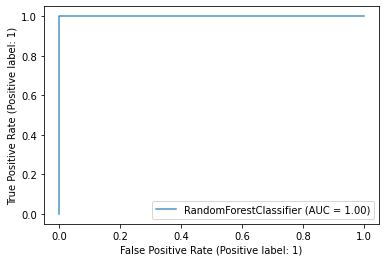

In [10]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf_s, X_res, y_res, ax=ax, alpha=0.8) #plotting roc curve for alpha=0.8
plt.show()

In [11]:
clf_s1 = LogisticRegression() #modelling for logistic regression
clf_s1.fit(x_train, y_train)

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
y_pred = clf_s1.predict(x_test) #predicting the testing data
print(classification_report(y_test, y_pred)) #to give us the accuracy between predicted data and test data labels
print("Accuracy :", clf_s1.score(x_test, y_test)) 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2044
           1       0.73      0.35      0.47       422

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466

Accuracy : 0.8669910786699108


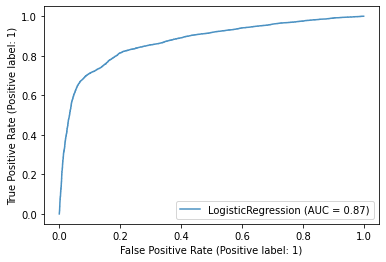

In [13]:
ax = plt.gca()
rfc_disp = plot_roc_curve(clf_s1, X_res, y_res, ax=ax, alpha=0.8)
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred) 
print(confusion_matrix)

[[1991   53]
 [ 275  147]]


We observe that the accuracy using Random Forests is higher than Logistic regression. The accuracies are 89.2 and 86.8% respectively. The ROC Curves are also shown for both the algorithms. For the logistic regression, a confusion matrix is also shown. 